In [1]:
#数据生成器生成训练集与测试集
from keras.preprocessing.image import ImageDataGenerator
IMSIZE=224
#定义图片数据生成器
train_generator=ImageDataGenerator(rescale=1. / 255).flow_from_directory(
    './data_inception/train',          #读取数据
    target_size=(IMSIZE,IMSIZE), #设置规定图片的大小
    batch_size=100,              #批处理大小
    class_mode='categorical')    #类的模型是'categorical'
validation_generator=ImageDataGenerator(
    rescale=1./255).flow_from_directory( #重新调节图片
        './data_inception/test',
        target_size=(IMSIZE,IMSIZE),
        batch_size=100,
        class_mode='categorical')

Found 952 images belonging to 17 classes.
Found 408 images belonging to 17 classes.


<Figure size 432x288 with 0 Axes>

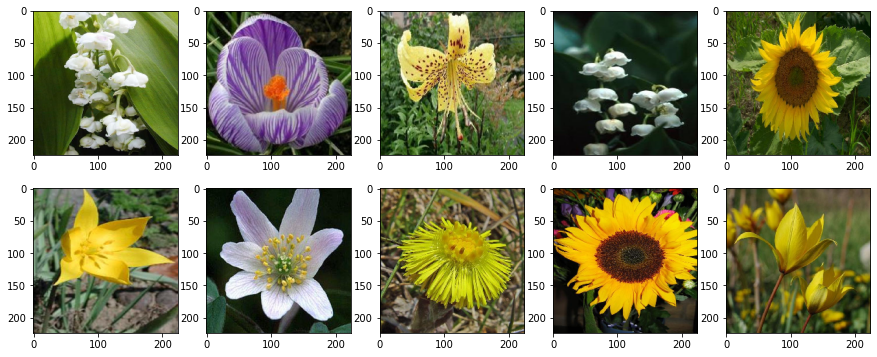

In [2]:
#图像展示
from matplotlib import pyplot as plt

plt.figure()
fig,ax=plt.subplots(2,5) #定义一个2行5列的显示框图
fig.set_figheight(6)     #显示图的高为6
fig.set_figwidth(15)     #显示图的宽为15
ax=ax.flatten()
X,Y=next(validation_generator)
for i in range(10):     #随机选择数据集中10张图片来显示
    ax[i].imshow(X[i,:,:,])

In [7]:
from keras.layers import Input
from keras.layers import Activation,Conv2D,BatchNormalization,add,MaxPooling2D
NB_CLASS=17
IM_WIDTH=224
IM_HEIGHT=224
inpt = Input(shape=(IM_WIDTH,IM_HEIGHT,3))
x = Conv2D(64,(7,7),padding='same',strides=(2,2),activation='relu')(inpt)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(3,3),strides=(2,2), padding='same')(x)

# x = Conv2D(64,(7,7),padding='same',strides=(1,1),activation='relu')(inpt)
# x = BatchNormalization()(x)
# x = MaxPooling2D(pool_size=(3,3),strides=(1,1), padding='same')(x)
x0 = x

# 一个block
x = Conv2D(64,(1,1),padding='same',strides=(1,1),activation='relu')(x)
x = BatchNormalization()(x)
x = Conv2D(64,(3,3),padding='same',strides=(1,1),activation='relu')(x)
x = BatchNormalization()(x)
x = Conv2D(256,(1,1),padding='same',strides=(1,1),activation=None)(x)
x = BatchNormalization()(x)

x0 = Conv2D(256,(1,1),padding='same',strides=(1,1),activation='relu')(x0)
x0 =BatchNormalization()(x0)
add([x,x0])
x = Activation('relu')(x)
x0 = x

from keras.models import Model
model2 = Model(inputs=inpt,outputs=x)
model2.summary ( )

from keras.layers import Dense,Flatten
x = model2.output
x = Flatten()(x)
predictions = Dense(NB_CLASS,activation='softmax')(x)
model_res = Model(inputs=model2.input,outputs=predictions)

Model: "functional_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 112, 112, 64)      9472      
_________________________________________________________________
batch_normalization_10 (Batc (None, 112, 112, 64)      256       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 56, 56, 64)        4160      
_________________________________________________________________
batch_normalization_11 (Batc (None, 56, 56, 64)        256       
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 56, 56, 64)       

In [17]:
# #构建AlexNet模型
# import tensorflow as tf
# from tensorflow.keras import Sequeatial
# (x_train,x_train),(x_test,x_test)=tf.keras.datasets.mnist.load_data()


# model = tf.keras.models.Sequential([
#     #第一层卷积核为11*11
#     tf.keras.layers.Conv2D(filters=96,kernel_size=(11,11), strides=(4,4),padding='valid',activation='relu',input_shapa=(227,227,3)),
#     #第二层为最大池化层
#     tf.keras.layers.MaxPooling2D(pool_size=(3,3),strides=(2,2)),
#     #第三层的输入为第二池化输出，做规格大小为5*5的卷积
#     tf.keras.layers.Conv2D(filters=256,kernel_size(5,5),padding="same",activation='relu'),
#     tf.keras.layers.MaxPooling2D(pool_size=(3,3),strides=(2,2)),
#     tf.keras.layers.Conv2D(filters=384,kernel_size(3,3),padding="same",activation='relu'),
#     tf.keras.layers.Conv2D(filters=384,kernel_size(3,3),padding="same",activation='relu'),
#     tf.keras.layers.Conv2D(filters=256,kernel_size(3,3),padding="same",activation='relu'),
#     tf.keras.layers.Dense(units=4096,activation='relu'),
#     tf.keras.layers.Dropout(0.5),
#     tf.keras.layers.Dense(units=4096,actiration='relu' ),
#     tf.keras.layers.Dropout(0.5),
#     tf.keras.layers.Danse(uanits=2,activation='softmax'),
# ])
# model.sunnary()




# from keras.layers import Activation,Conv2D,Dense
# from keras.layers import Dropout,Flatten,Input,MaxPooling2D
# from keras import Model

# #构建AlexNet模型
# IMSIZE=227
# input_layer=Input([IMSIZE,IMSIZE,3])
# x=input_layer
# #第一层卷积核为11*11
# x=Conv2D(96,[11,11],strides=[4,4],activation="relu")(x)

# #第二层为最大值池化
# x=MaxPooling2D([3,3],strides=[2,2])(x)

# #第三层的输入为第二池化输出，做规格大小为5*5的卷积
# x=Conv2D(256,[5,5],padding="same",activation="relu")(x)
# x=MaxPooling2D([3,3],strides=[2,2])(x)
# x=Conv2D(384,[3,3],padding="same",activation="relu")(x)
# x=Conv2D(384,[3,3],padding="same",activation="relu")(x)
# x=Conv2D(256,[3,3],padding="same",activation="relu")(x)
# x=MaxPooling2D([3,3],strides=[2,2])(x)
# x=Flatten()(x)
# x=Dense(4096,activation="relu")(x)
# x=Dropout(0.5)(x)
# x=Dense(4096,activation="relu")(x)
# x=Dropout(0.5)(x)
# x=Dense(2,activation="softmax")(x)
# output_layer=x
# model=Model(input_layer,output_layer)
# model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 227, 227, 3)]     0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 55, 55, 96)        34944     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 27, 27, 96)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 27, 27, 256)       614656    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 256)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 13, 13, 384)       885120    
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 13, 13, 384)       1327

In [ ]:
# #模型编译与拟合
# from keras.optimizers import Adam
# #损失函数指定为categorical_crossentropy,优化方法为Adam（学习速率为0.001），评价指标为预测精度。
# model.compile(loss="categorical_crossentropy",optimizer=Adam(lr=0.001),metrics=["accuracy"])
# model.fit_generator(train_generator,epochs=5,validation_data=validation_generator)

from keras.optimizers import Adam
model_res.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.001),metrics=['accuracy'])
model_res.fit_generator (
    train_generator,
    steps_per_epoch=250,
    epochs=5,
    validation_data = validation_generator,
    validation_steps=100)

Epoch 1/5
  4/250 [..............................] - ETA: 2:47:13 - loss: 207.2857 - accuracy: 0.2700